# US market stock data analysis project
- 3 stocks selected:
  - Apple - APPL
  - Google - GOOG
  - Microsoft - MSFT
- Data source: Historical stock data from investing.com
- Time: December 30, 2019 - December 28, 2020
- Data fields: Date, High, Low, Open, Close, Volume, Adj Close
- Analysis directions:
    1. Descriptive analysis of data sets
    2. Calculate related parameters: daily return, MA
    3. Find out the correlation coefficient of stocks

# Check path file

In [ ]:
# Check the path and file before reading them
import os
checkFileApple = os.path.isfile("/content/AAPL.csv")
checkFileGoogle = os.path.isfile("/content/GOOG.csv")
checkFileMicrosoft = os.path.isfile("/content/MSFT.csv")
print("The file is valid or not :", checkFileApple, checkFileGoogle, checkFileMicrosoft)

The file is valid or not : True True True


# Data Understanding

In [ ]:
import pandas as pd
AAPL = pd.read_csv("/content/AAPL.csv")
GOOG = pd.read_csv("/content/GOOG.csv")
MSFT = pd.read_csv("/content/MSFT.csv")
print(type(AAPL), type(GOOG), type(MSFT))
print("Shape AAPL : ", AAPL.shape, " Rows:", AAPL.shape[0], " Cols:", AAPL.shape[1])
print("Shape GOOG : ", GOOG.shape, " Rows:", GOOG.shape[0], " Cols:", GOOG.shape[1])
print("Shape MSFT : ", MSFT.shape, " Rows:", MSFT.shape[0], " Cols:", MSFT.shape[1])

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
Shape AAPL :  (252, 7)  Rows: 252  Cols: 7
Shape GOOG :  (252, 7)  Rows: 252  Cols: 7
Shape MSFT :  (252, 7)  Rows: 252  Cols: 7


In [ ]:
# Show dataframe
display(AAPL.head(5))
display(GOOG.head(5))
display(MSFT.head(5))

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.255997
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.783936
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.444603
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.720840
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308266


,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-30,1353.000000,1334.020020,1350.000000,1336.140015,1050900,1336.140015
1,2019-12-31,1338.000000,1329.084961,1330.109985,1337.020020,961800,1337.020020
2,2020-01-02,1368.140015,1341.550049,1341.550049,1367.369995,1406600,1367.369995
3,2020-01-03,1372.500000,1345.543945,1347.859985,1360.660034,1186400,1360.660034
4,2020-01-06,1396.500000,1350.000000,1350.000000,1394.209961,1732300,1394.209961


,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,155.938049
1,2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,156.046890
2,2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,158.936279
3,2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,156.957260
4,2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,157.362961


In [ ]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,96.001984,93.270486,94.602609,94.713581,1.529956e+08,94.404131
std,21.794985,21.274377,21.688715,21.527714,7.279392e+07,21.670565
min,57.125000,53.152500,57.020000,56.092499,2.420510e+07,55.744217
25%,77.602499,75.740623,76.339378,77.219378,1.055816e+08,76.653057
50%,92.018749,89.814999,91.051250,91.113747,1.372656e+08,90.793121
75%,117.040625,113.973751,115.587502,115.545626,1.830576e+08,115.346626
max,137.979996,133.509995,137.589996,136.690002,4.268848e+08,136.690002


In [ ]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,1494.710024,1457.735825,1475.100180,1477.056366,1.892990e+06,1477.056366
std,173.127274,177.040494,174.811362,174.278257,7.694619e+05,174.278257
min,1071.319946,1013.536011,1056.510010,1056.619995,3.468000e+05,1056.619995
25%,1410.352539,1375.302490,1390.224945,1392.162537,1.396325e+06,1392.162537
50%,1486.299988,1458.727539,1469.100037,1471.604980,1.660750e+06,1471.604980
75%,1584.528290,1539.637451,1560.535004,1566.099976,2.155150e+06,1566.099976
max,1847.199951,1822.650024,1824.520020,1827.989990,4.329100e+06,1827.989990


In [ ]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,194.816111,189.737857,192.257183,192.391468,3.771676e+07,191.430282
std,22.676827,23.265468,23.092997,23.019564,1.692064e+07,23.389299
min,140.570007,132.520004,137.009995,135.419998,1.055060e+07,134.366470
25%,174.959999,170.769997,173.987503,173.654999,2.626408e+07,172.303989
50%,203.055000,196.470001,199.790001,200.580002,3.280485e+07,199.966469
75%,214.745003,209.772499,212.234997,212.430000,4.391550e+07,211.771770
max,232.860001,227.350006,229.270004,231.649994,9.707360e+07,231.045105


# Data Preparation

In [ ]:
#Tranformation Data
#Reduce the decimal part of Adj Close

In [ ]:
AAPL['Adj Close'] = AAPL['Adj Close'].round(decimals=3)
AAPL.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.256
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.784
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.445
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.721
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308


In [ ]:
GOOG['Adj Close'] = GOOG['Adj Close'].round(decimals=3)
GOOG.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-30,1353.000000,1334.020020,1350.000000,1336.140015,1050900,1336.14
1,2019-12-31,1338.000000,1329.084961,1330.109985,1337.020020,961800,1337.02
2,2020-01-02,1368.140015,1341.550049,1341.550049,1367.369995,1406600,1367.37
3,2020-01-03,1372.500000,1345.543945,1347.859985,1360.660034,1186400,1360.66
4,2020-01-06,1396.500000,1350.000000,1350.000000,1394.209961,1732300,1394.21


In [ ]:
MSFT['Adj Close'] = MSFT['Adj Close'].round(decimals=3)
MSFT.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,155.938
1,2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,156.047
2,2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,158.936
3,2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,156.957
4,2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,157.363


In [ ]:
#Calculate the value of MA(Moving Average) lines
#Calculate the daily return

In finance, a moving average (MA) is a stock indicator commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.

**Apple**

In [ ]:
ma = 10
column_name = "MA %s days" %(str(ma))
AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

ma = 20
column_name = "MA %s days" %(str(ma))
AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

ma = 50
column_name = "MA %s days" %(str(ma))
AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()
AAPL.head(55)

,Date,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.256,NaN,NaN,NaN
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.784,NaN,NaN,NaN
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.445,NaN,NaN,NaN
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.721,NaN,NaN,NaN
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308,NaN,NaN,NaN
5,1/7/2020,75.224998,74.370003,74.959999,74.597504,108872000,73.959,NaN,NaN,NaN
6,1/8/2020,76.110001,74.290001,74.290001,75.797501,132079200,75.149,NaN,NaN,NaN
7,1/9/2020,77.607498,76.550003,76.809998,77.407501,170108400,76.745,NaN,NaN,NaN
8,1/10/2020,78.167503,77.062500,77.650002,77.582497,140644800,76.918,NaN,NaN,NaN
9,1/13/2020,79.267502,77.787498,77.910004,79.239998,121532000,78.562,74.8847,NaN,NaN


In [ ]:
#In order calculate daily return I use the percentage change of the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days,Daily Return
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.256,NaN,NaN,NaN,NaN
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.784,NaN,NaN,NaN,0.007307
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.445,NaN,NaN,NaN,0.022821
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.721,NaN,NaN,NaN,-0.009725
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308,NaN,NaN,NaN,0.007962


**Google**

In [ ]:
ma = 10
column_name = "MA %s days" %(str(ma))
GOOG[column_name] = GOOG['Adj Close'].rolling(window=ma,center=False).mean()

ma = 20
column_name = "MA %s days" %(str(ma))
GOOG[column_name] = GOOG['Adj Close'].rolling(window=ma,center=False).mean()

ma = 50
column_name = "MA %s days" %(str(ma))
GOOG[column_name] = GOOG['Adj Close'].rolling(window=ma,center=False).mean()

GOOG.head(55)

In [ ]:
#In order calculate daily return I use the percentage change of the adjusted closing price
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
GOOG.head()

**Microsoft**

In [ ]:
ma = 10
column_name = "MA %s days" %(str(ma))
MSFT[column_name] = MSFT['Adj Close'].rolling(window=ma,center=False).mean()

ma = 20
column_name = "MA %s days" %(str(ma))
MSFT[column_name] = MSFT['Adj Close'].rolling(window=ma,center=False).mean()

ma = 50
column_name = "MA %s days" %(str(ma))
MSFT[column_name] = MSFT['Adj Close'].rolling(window=ma,center=False).mean()

MSFT.head(55)

In [ ]:
#In order calculate daily return I use the percentage change of the adjusted closing price
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
MSFT.head()

# Data Visualization

Use libraries ***seaborn*** to visualize data

In [ ]:
import seaborn as sns

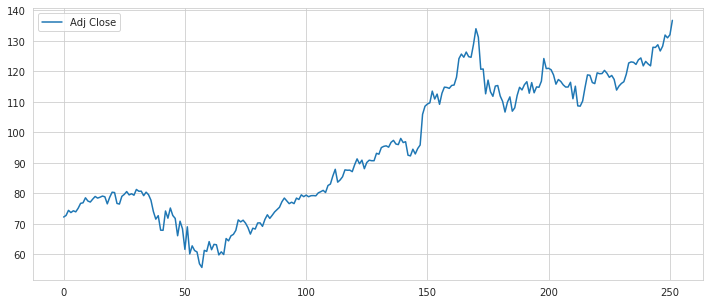

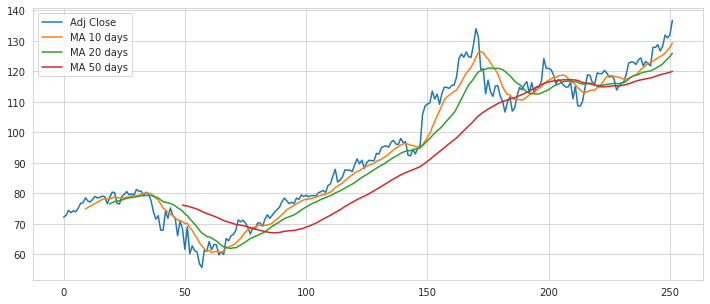

In [ ]:
sns.set_style('whitegrid')
AAPL['Adj Close'].plot(legend = True, figsize=(12,5))
AAPL[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(figsize=(12,5))


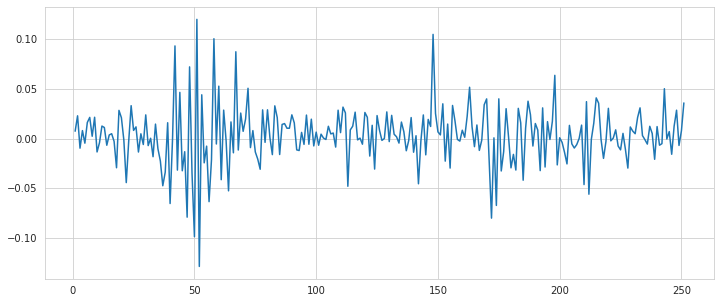

In [ ]:
#Plot the daily return
AAPL['Daily Return'].plot(figsize=(12,5))

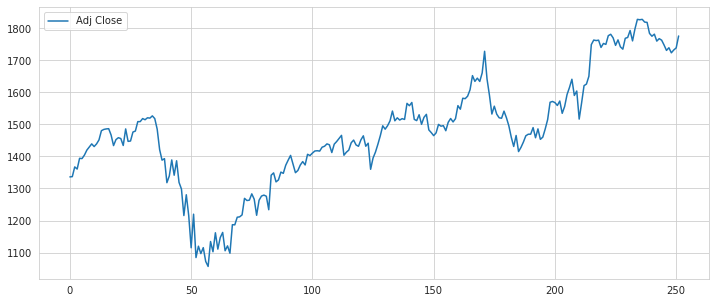

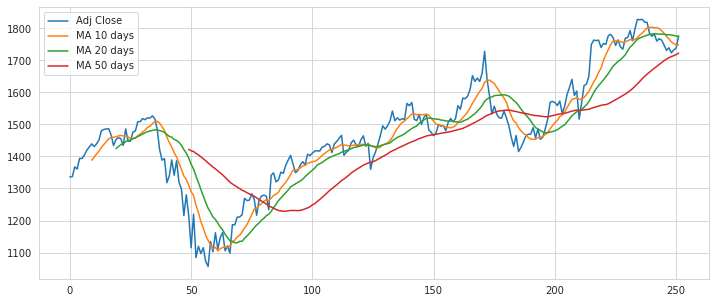

In [ ]:
sns.set_style('whitegrid')
GOOG['Adj Close'].plot(legend = True, figsize=(12,5))
GOOG[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(figsize=(12,5))

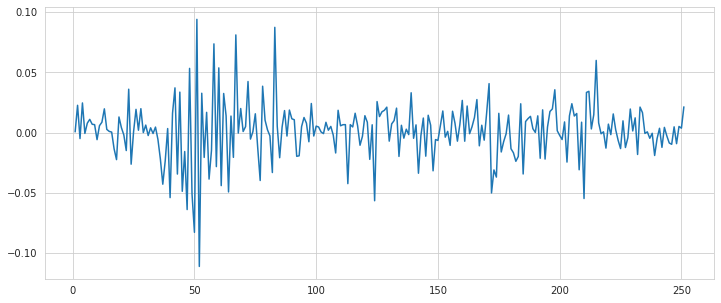

In [ ]:
#Plot the daily return
GOOG['Daily Return'].plot(figsize=(12,5))

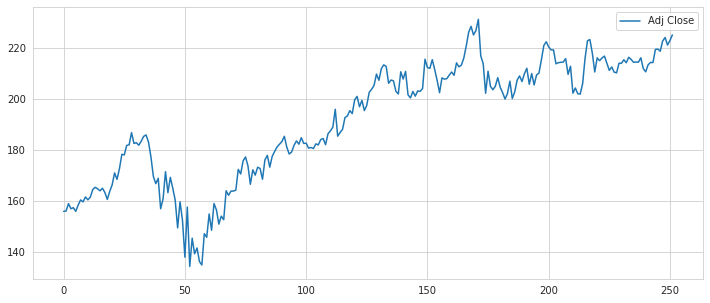

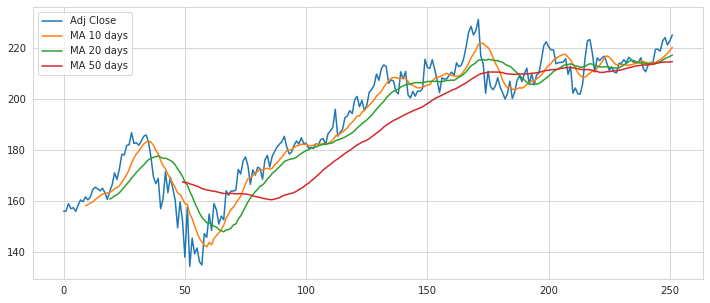

In [ ]:
sns.set_style('whitegrid')
MSFT['Adj Close'].plot(legend = True, figsize=(12,5))
MSFT[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(figsize=(12,5))

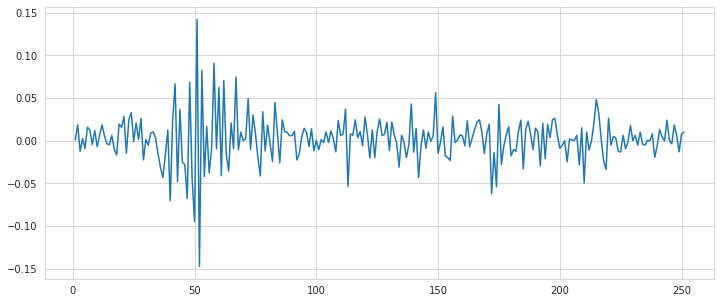

In [ ]:
#Plot the daily return
MSFT['Daily Return'].plot(figsize=(12,5))

# Find out the Correlation Coefficient stocks

In [ ]:
all_stocks = pd.DataFrame( columns = ['Apple', 'Google', 'Microsoft'], index=AAPL["Date"]) 
all_stocks['Apple'] = AAPL["Adj Close"].values
all_stocks['Google'] = GOOG["Adj Close"].values
all_stocks['Microsoft'] = MSFT["Adj Close"].values
all_stocks.head()

,Apple,Google,Microsoft
Date,,,
12/30/2019,72.256,1336.14,155.938
12/31/2019,72.784,1337.02,156.047
1/2/2020,74.445,1367.37,158.936
1/3/2020,73.721,1360.66,156.957
1/6/2020,74.308,1394.21,157.363


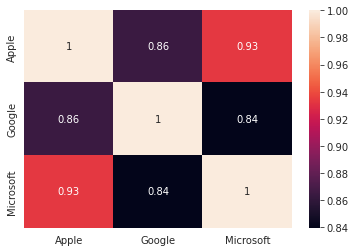

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = all_stocks.dropna().corr()
sns.heatmap(corr, annot=True)

Sort highly correlated stock pairs:
1. Apple ~ Microsoft = 0.93
2. Google ~ Apple = 0.86
3. Microsoft ~ Google = 0.84



